# 서포트 벡터 머신(Support Vector Machines)

* 회귀, 분류, 이상치 탐지 등에 사용되는 지도학습 방법
* 클래스 사이의 경계에 위치한 데이터 포인트를 서포트 벡터(support vector)라고 함
* 각 지지 벡터가 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지를 학습
* 각 지지 벡터 사이의 마진이 가장 큰 방향으로 학습
* 지지 벡터 까지의 거리와 지지 벡터의 중요도를 기반으로 예측을 수행

![support vector machine](https://upload.wikimedia.org/wikipedia/commons/thumb/2/20/Svm_separating_hyperplanes.png/220px-Svm_separating_hyperplanes.png)

* H3은 두 클래스의 점들을 제대로 분류하고 있지 않음
* H1과 H2는 두 클래스의 점들을 분류하는데, H2가 H1보다 더 큰 마진을 갖고 분류하는 것을 확인할 수 있음

In [1]:
import multiprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

<ipython-input-1-21768eb40cee>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-whitegrid'])


In [2]:
from sklearn.svm import SVR,SVC #SVR은 회귀 SVC는 분류
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_breast_cancer,load_iris,load_wine
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE

## SVM을 이용한 회귀 모델과 분류 모델

### SVM을 사용한 회귀 모델 (SVR)

In [3]:
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/boston.csv'
data = pd.read_csv(path)

In [4]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=123)

In [6]:
model = SVR()
model.fit(X_train,y_train)

print(f"학습데이터 점수:{model.score(X_train,y_train)}")
print(f"평가데이터 점수:{model.score(X_test,y_test)}")

학습데이터 점수:0.2177283706374875
평가데이터 점수:0.13544178468518187


In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def get_reg_eval(y_test, y_pred,proba_pred=None):
    MAE = mean_absolute_error(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test, y_pred)

    print('Mean Absolute Error (MAE): {:.4f}'.format(MAE))
    print('Mean Squared Error (MSE): {:.4f}'.format(MSE))
    print('Root Mean Squared Error (RMSE): {:.4f}'.format(RMSE))
    print('R-squared (R2): {:.4f}'.format(R2))

In [8]:
pred_svr = model.predict(X_test)

In [9]:
get_reg_eval(y_test,pred_svr)

Mean Absolute Error (MAE): 5.3271
Mean Squared Error (MSE): 68.2502
Root Mean Squared Error (RMSE): 8.2614
R-squared (R2): 0.1354


### SVM을 사용한 분류 모델 (SVC)

In [16]:
from sklearn.metrics import accuracy_score

In [10]:
bc = load_breast_cancer()

In [11]:
df = pd.DataFrame(bc.data, columns=bc.feature_names)

In [12]:
df['Target']=bc.target

In [13]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=123)

In [17]:
model1 = SVC()
model1.fit(X_train,y_train)
pred_1 = model1.predict(X_test)
print(f"학습데이터 점수:{model1.score(X_train,y_train)}")
print(f"평가데이터 점수:{model1.score(X_test,y_test)}")
print(accuracy_score(y_test,pred_1))

학습데이터 점수:0.9014084507042254
평가데이터 점수:0.9230769230769231
0.9230769230769231


In [18]:
from xgboost import XGBClassifier

In [19]:
model_2 = XGBClassifier()
model_2.fit(X_train,y_train)
pred = model_2.predict(X_test)
pred_proba= model_2.predict_proba(X_test)[:,1]

In [24]:
get_clf_eval(y_test,pred,pred_proba)

오차행렬:
 [[52  2]
 [ 1 88]]

정확도: 0.9790
정밀도: 0.9778
재현율: 0.9888
F1: 0.9832
AUC: 0.9950


In [25]:
from sklearn.metrics import RocCurveDisplay

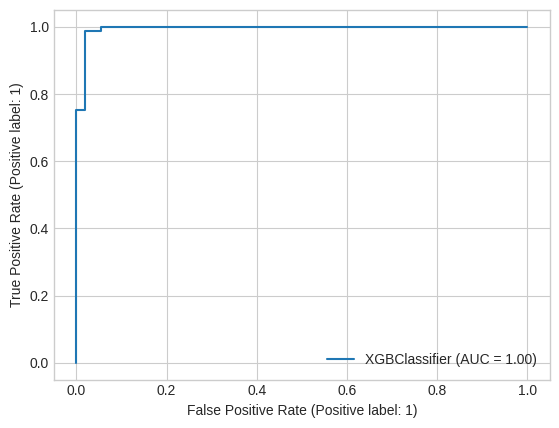

In [26]:
RocCurveDisplay.from_estimator(model_2 , X_test, y_test)

In [21]:
pred_1=model1.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

def get_clf_eval(y_test, y_pred=None,proba_pred=None):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, proba_pred)# 원래는 proba로 해야함

    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

## 커널 기법

* 입력 데이터를 고차원 공간에 사상해서 비선형 특징을 학습할 수 있도록 확장하는 방법
* scikit-learn에서는 Linear, Polynomial(비선형), RBF(Radial Basis Function)(비선형)등 다양한 커널 기법을 지원

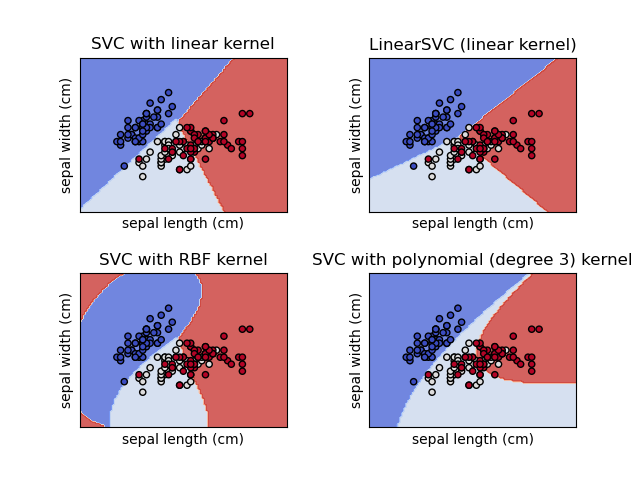

In [27]:
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [29]:
X= data.iloc[:,:-1]
y=data['medv']

In [30]:
X= data.iloc[:,:-1]
y=data['medv']
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=123)

In [31]:
linear_svr = SVR(kernel='linear')
linear_svr.fit(X_train,y_train)


print(f"학습데이터 점수:{linear_svr.score(X_train,y_train)}")
print(f"평가데이터 점수:{linear_svr.score(X_test,y_test)}")


polynomial_svr = SVR(kernel='poly')
polynomial_svr.fit(X_train,y_train)


print(f"학습데이터 점수:{polynomial_svr.score(X_train,y_train)}")
print(f"평가데이터 점수:{polynomial_svr.score(X_test,y_test)}")


rbf_svr=SVR(kernel='rbf')
rbf_svr.fit(X_train,y_train)


print(f"학습데이터 점수:{rbf_svr.score(X_train,y_train)}")
print(f"평가데이터 점수:{rbf_svr.score(X_test,y_test)}")

학습데이터 점수:0.715506620496448
평가데이터 점수:0.6380398541506058
학습데이터 점수:0.2024454261446289
평가데이터 점수:0.133668450367462
학습데이터 점수:0.2177283706374875
평가데이터 점수:0.13544178468518187


In [32]:
polynomial_svr = SVR(kernel='poly')
polynomial_svr.fit(X_train,y_train)


print(f"학습데이터 점수:{polynomial_svr.score(X_train,y_train)}")
print(f"평가데이터 점수:{polynomial_svr.score(X_test,y_test)}")

학습데이터 점수:0.2024454261446289
평가데이터 점수:0.133668450367462


In [33]:
rbf_svr=SVR(kernel='rbf')
rbf_svr.fit(X_train,y_train)


print(f"학습데이터 점수:{rbf_svr.score(X_train,y_train)}")
print(f"평가데이터 점수:{rbf_svr.score(X_test,y_test)}")

학습데이터 점수:0.2177283706374875
평가데이터 점수:0.13544178468518187


- svc

In [34]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=123)

linear_svc = SVC(kernel='linear')
linear_svc.fit(X_train,y_train)


print(f"학습데이터 점수:{linear_svc.score(X_train,y_train)}")
print(f"평가데이터 점수:{linear_svc.score(X_test,y_test)}")


polynomial_svc = SVC(kernel='poly')
polynomial_svc.fit(X_train,y_train)


print(f"학습데이터 점수:{polynomial_svc.score(X_train,y_train)}")
print(f"평가데이터 점수:{polynomial_svc.score(X_test,y_test)}")


rbf_svc=SVC(kernel='rbf')
rbf_svc.fit(X_train,y_train)


print(f"학습데이터 점수:{rbf_svc.score(X_train,y_train)}")
print(f"평가데이터 점수:{rbf_svc.score(X_test,y_test)}")

# 15분 4초

학습데이터 점수:0.960093896713615
평가데이터 점수:0.986013986013986
학습데이터 점수:0.9014084507042254
평가데이터 점수:0.9230769230769231
학습데이터 점수:0.9014084507042254
평가데이터 점수:0.9230769230769231


## 매개변수 튜닝

* SVM은 사용하는 커널에 따라 다양한 매개변수 설정 가능
* 매개변수를 변경하면서 성능변화를 관찰

In [35]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=123)


In [36]:
polynomial_svc = SVC(kernel='poly',degree=2, C=0.1, gamma='auto')
polynomial_svc.fit(X_train,y_train)

SVC(C=0.1, degree=2, gamma='auto', kernel='poly')

In [37]:
print(f"학습데이터 점수:{polynomial_svc.score(X_train,y_train)}")
print(f"평가데이터 점수:{polynomial_svc.score(X_test,y_test)}")

학습데이터 점수:0.9835680751173709
평가데이터 점수:0.993006993006993


In [38]:
rbf_svc=SVC(kernel='rbf',C=1.5, gamma='scale') # degree x
rbf_svc.fit(X_train,y_train)


print(f"학습데이터 점수:{rbf_svc.score(X_train,y_train)}")
print(f"평가데이터 점수:{rbf_svc.score(X_test,y_test)}")

학습데이터 점수:0.9061032863849765
평가데이터 점수:0.9370629370629371


## 데이터 전처리

* SVM은 입력 데이터가 정규화 되어야 좋은 성능을 보임
* 주로 모든 특성 값을 [0, 1] 범위로 맞추는 방법을 사용
* scikit-learn의 StandardScaler 또는 MinMaxScaler를 사용해 정규화

In [39]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
#유방암 데이터
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=123)

In [40]:
model=SVC()
model.fit(X_train,y_train)


print(f"학습데이터 점수:{model.score(X_train,y_train)}")
print(f"평가데이터 점수:{model.score(X_test,y_test)}")

학습데이터 점수:0.9014084507042254
평가데이터 점수:0.9230769230769231


In [41]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

In [42]:
model=SVC()
model.fit(X_train,y_train)


print(f"학습데이터 점수:{model.score(X_train,y_train)}")
print(f"평가데이터 점수:{model.score(X_test,y_test)}")

학습데이터 점수:0.9835680751173709
평가데이터 점수:0.986013986013986


In [43]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

In [44]:
model=SVC()
model.fit(X_train,y_train)


print(f"학습데이터 점수:{model.score(X_train,y_train)}")
print(f"평가데이터 점수:{model.score(X_test,y_test)}")

학습데이터 점수:0.9812206572769953
평가데이터 점수:0.986013986013986


## Linear SVR

### 보스턴 주택 가격

In [45]:
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [46]:
X= data.iloc[:,:-1]
y=data['medv']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [47]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

In [48]:
model = SVR(kernel='linear')
model.fit(X_train,y_train)

SVR(kernel='linear')

In [49]:
print(f"학습데이터 점수:{model.score(X_train,y_train)}")
print(f"평가데이터 점수:{model.score(X_test,y_test)}")

학습데이터 점수:0.7299204419970706
평가데이터 점수:0.6125037065549834


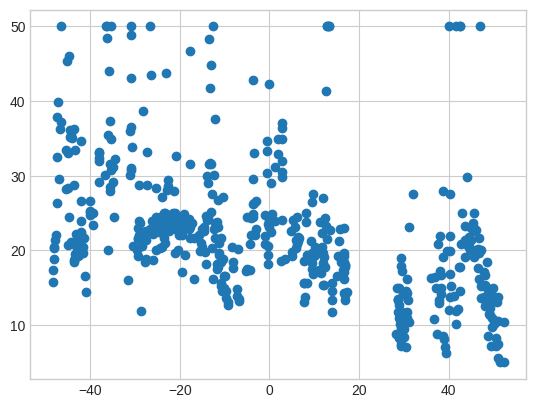

In [50]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp,y)

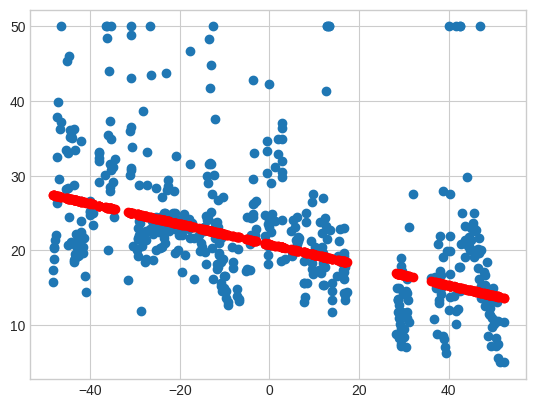

In [51]:
model.fit(X_comp,y)
predict= model.predict(X_comp)
plt.scatter(X_comp,y)
plt.scatter(X_comp,predict, color='r')

In [56]:
estimator = make_pipeline(
    StandardScaler(),
    SVR(kernel='linear')
)

cross_validate(
    estimator=estimator,
    X=X,
    y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    5.6s finished


{'fit_time': array([0.09165835, 0.07728744, 0.05862784, 0.12290144, 0.10870433]),
 'score_time': array([0.0127089 , 0.00969648, 0.01065159, 0.01775742, 0.01827192]),
 'test_score': array([0.76908568, 0.72180141, 0.56428426, 0.14083339, 0.07810211])}

In [58]:
from sklearn.pipeline import Pipeline

In [63]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVR(kernel='linear'))
])

param_grid = [
    {
        'model__gamma': ['scale', 'auto'],
        'model__C': [1.0, 0.1, 0.01],
        'model__epsilon': [1.0, 0.1, 0.01]
    }
]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [64]:
gs.best_score_

0.49854468515517336

In [65]:
pipe = make_pipeline(
    StandardScaler(),
    SVR(kernel='linear')
)

param_grid = {
    'svr__gamma': ['scale', 'auto'],  # 파이프라인에서 SVR의 이름은 svr
    'svr__C': [1.0, 0.1, 0.01],
    'svr__epsilon': [1.0, 0.1, 0.01]
}

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)

In [66]:
gs.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svr', SVR(kernel='linear'))]),
             n_jobs=2,
             param_grid={'svr__C': [1.0, 0.1, 0.01],
                         'svr__epsilon': [1.0, 0.1, 0.01],
                         'svr__gamma': ['scale', 'auto']},
             verbose=True)

In [68]:
from sklearn.metrics import r2_score

In [70]:
estimator=gs.best_estimator_

pred=estimator.predict(X_test)

In [71]:
r2 = r2_score(y_test, pred)
print("R^2 Score:", r2)

R^2 Score: 0.619986337030424


### 당뇨병

In [77]:
diabetes= load_diabetes()

In [78]:
dbe=pd.DataFrame(diabetes.data , columns=diabetes.feature_names)
dbe['Target']=diabetes.target

In [79]:
dbe

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [80]:
X=dbe.iloc[:,:-1]
y=dbe.iloc[:,-1]

In [83]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [86]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [87]:
model= SVR(kernel='linear')
model.fit(X_train,y_train)

SVR(kernel='linear')

In [89]:
print(model.score(X_train,y_train))

0.537501501151145


In [88]:
linear_svr = SVR(kernel='linear')
linear_svr.fit(X_train,y_train)


print(f"학습데이터 점수:{linear_svr.score(X_train,y_train)}")
print(f"평가데이터 점수:{linear_svr.score(X_test,y_test)}")


polynomial_svr = SVR(kernel='poly')
polynomial_svr.fit(X_train,y_train)


print(f"학습데이터 점수:{polynomial_svr.score(X_train,y_train)}")
print(f"평가데이터 점수:{polynomial_svr.score(X_test,y_test)}")


rbf_svr=SVR(kernel='rbf')
rbf_svr.fit(X_train,y_train)


print(f"학습데이터 점수:{rbf_svr.score(X_train,y_train)}")
print(f"평가데이터 점수:{rbf_svr.score(X_test,y_test)}")

학습데이터 점수:0.537501501151145
평가데이터 점수:0.00539615107392577
학습데이터 점수:0.27652996953428266
평가데이터 점수:-0.10121808767919038
학습데이터 점수:0.19626998545110874
평가데이터 점수:-0.0922580216751967


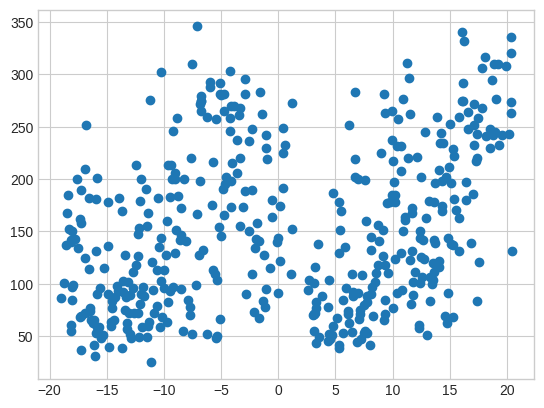

In [91]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp,y)

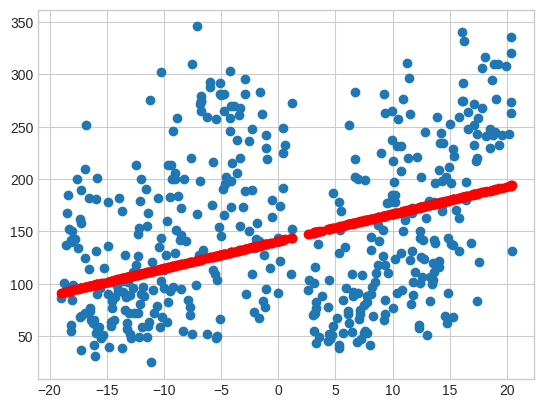

In [92]:
model.fit(X_comp,y)
predict= model.predict(X_comp)
plt.scatter(X_comp,y)
plt.scatter(X_comp,predict, color='r')

In [93]:
estimator = make_pipeline(
    StandardScaler(),
    SVR(kernel='linear')
)

cross_validate(
    estimator=estimator,
    X=X,
    y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.8s finished


{'fit_time': array([0.02437735, 0.01963305, 0.02930021, 0.02224636, 0.01211238]),
 'score_time': array([0.00529075, 0.0051744 , 0.00530553, 0.00527692, 0.00314999]),
 'test_score': array([0.43039087, 0.51655019, 0.48275821, 0.4224617 , 0.53077081])}

In [95]:
pipe = make_pipeline(
    StandardScaler(),
    SVR(kernel='linear')
)

param_grid = {
    'svr__gamma': ['scale', 'auto'],  # 파이프라인에서 SVR의 이름은 svr
    'svr__C': [1.0, 0.1, 0.01],
    'svr__epsilon': [1.0, 0.1, 0.01]
}

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svr', SVR(kernel='linear'))]),
             n_jobs=2,
             param_grid={'svr__C': [1.0, 0.1, 0.01],
                         'svr__epsilon': [1.0, 0.1, 0.01],
                         'svr__gamma': ['scale', 'auto']},
             verbose=True)

In [96]:
gs.best_score_

0.49881385207247825

## Kernel SVR

### 보스턴 주택 가격

In [97]:
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [98]:
X= data.iloc[:,:-1]
y=data['medv']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [99]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

In [100]:
model = SVR(kernel='rbf')
model.fit(X_train,y_train)

SVR()

In [101]:
print(f"학습데이터 점수:{model.score(X_train,y_train)}")
print(f"평가데이터 점수:{model.score(X_test,y_test)}")

학습데이터 점수:0.6786626093998924
평가데이터 점수:0.717159983893714


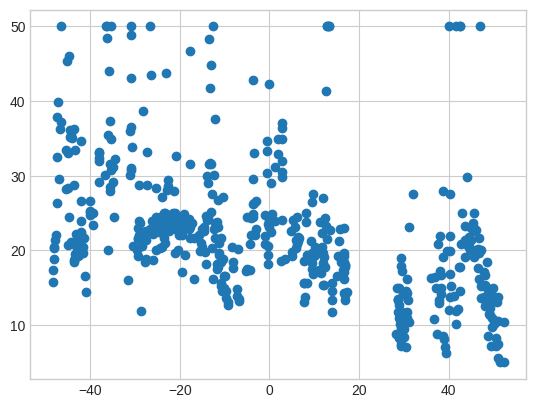

In [102]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp,y)

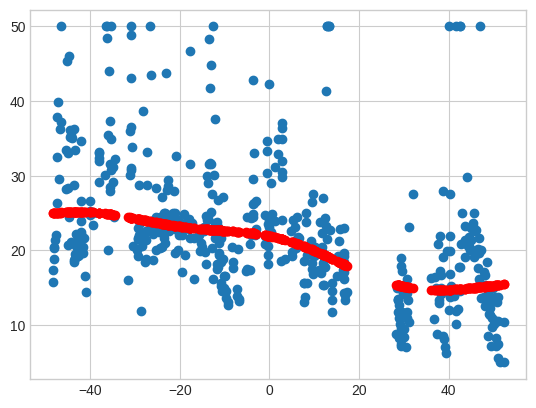

In [103]:
model.fit(X_comp,y)
predict= model.predict(X_comp)
plt.scatter(X_comp,y)
plt.scatter(X_comp,predict, color='r')

In [108]:
estimator = make_pipeline(
    StandardScaler(),
    SVR(kernel='rbf')
)

cross_validate(
    estimator=estimator,
    X=X,
    y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.2s finished


{'fit_time': array([0.03533959, 0.06848955, 0.02475619, 0.04014039, 0.04733801]),
 'score_time': array([0.00909615, 0.02219605, 0.00938845, 0.01846552, 0.02369142]),
 'test_score': array([ 0.75781445,  0.50211018,  0.04310107,  0.33851703, -0.75997942])}

In [115]:
pipe = make_pipeline(
    StandardScaler(),
    SVR(kernel='rbf')
)

param_grid = [{'svr__kernel': ['rbf', 'polynomial', 'sigmoid']}]


gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)


gs.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklear

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svr', SVR())]),
             n_jobs=2,
             param_grid=[{'svr__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             verbose=True)

In [119]:
gs.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

In [116]:
gs.best_score_

0.6235104966714815

In [117]:
estimator = gs.best_estimator_
pred=estimator.predict(X_test)
r2 = r2_score(y_test, pred)
print("R^2 Score:", r2)

R^2 Score: 0.7171599838937142


### 당뇨병

In [120]:
dbe

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


## Linear SVC

### 유방암

In [121]:
X, y = load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [122]:
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [134]:
model=SVC(kernel='linear')
model.fit(X_train,y_train)

SVC(kernel='linear')

In [135]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.989010989010989
0.9824561403508771


In [136]:
pred= model.predict(X_test)

In [137]:
r2=r2_score(y_test,pred)

In [138]:
print(r2)

0.9298029556650247


In [ ]:
def make_meshgrid(x,y,h=.02):
  x_min,y_max = x.min

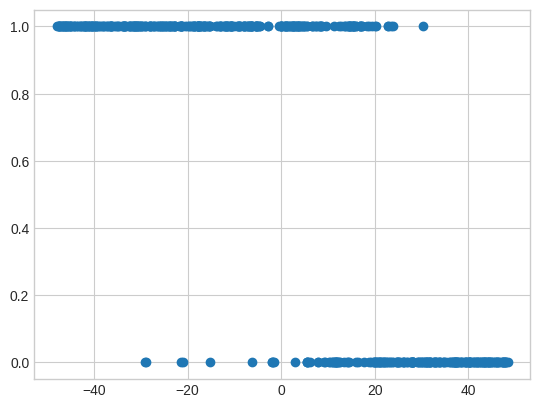

In [139]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp,y)

### 붓꽃

### 와인

## Kernel SVC

### 유방암

### 붓꽃

### 와인